In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv("delhi_traffic_features.csv")

In [ ]:
df.head()

,Trip_ID,start_area,end_area,distance_km,time_of_day,day_of_week,weather_condition,traffic_density_level,road_type,average_speed_kmph
0,TRIP_00001,Vasant Kunj,Kalkaji,9.44,Night,Weekday,Clear,Low,Main Road,37.8
1,TRIP_00002,Greater Kailash,Kalkaji,2.15,Night,Weekend,Clear,Low,Main Road,42.7
2,TRIP_00003,Janakpuri,Model Town,14.54,Morning Peak,Weekday,Rain,High,Inner Road,9.7
3,TRIP_00004,Punjabi Bagh,Dwarka,11.86,Night,Weekday,Clear,Low,Highway,68.5
4,TRIP_00005,Rohini,Chandni Chowk,20.26,Afternoon,Weekday,Fog,Medium,Highway,30.3


In [ ]:
df.isnull().sum()

,0
Trip_ID,0
start_area,0
end_area,0
distance_km,0
time_of_day,0
day_of_week,0
weather_condition,0
traffic_density_level,0
road_type,0
average_speed_kmph,0


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Trip_ID                4000 non-null   object 
 1   start_area             4000 non-null   object 
 2   end_area               4000 non-null   object 
 3   distance_km            4000 non-null   float64
 4   time_of_day            4000 non-null   object 
 5   day_of_week            4000 non-null   object 
 6   weather_condition      4000 non-null   object 
 7   traffic_density_level  4000 non-null   object 
 8   road_type              4000 non-null   object 
 9   average_speed_kmph     4000 non-null   float64
dtypes: float64(2), object(8)
memory usage: 312.6+ KB


In [ ]:
df.columns

Index(['Trip_ID', 'start_area', 'end_area', 'distance_km', 'time_of_day',
       'day_of_week', 'weather_condition', 'traffic_density_level',
       'road_type', 'average_speed_kmph'],
      dtype='object')

<Axes: xlabel='average_speed_kmph', ylabel='Count'>

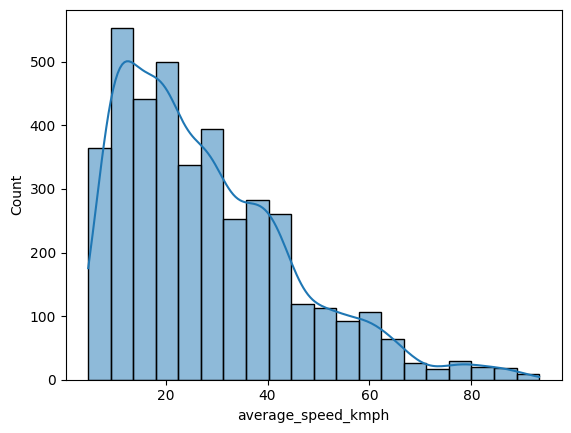

In [ ]:
sns.histplot(df['average_speed_kmph'] , bins = 20  , kde = True)

<Axes: xlabel='time_of_day', ylabel='average_speed_kmph'>

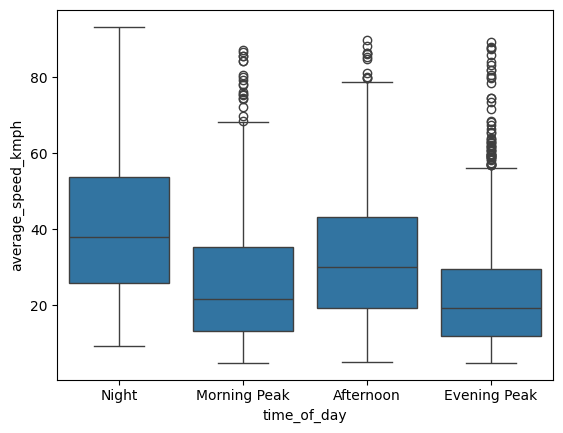

In [ ]:
sns.boxplot( y = df['average_speed_kmph'] ,  x = df['time_of_day'] )

<Axes: xlabel='road_type', ylabel='average_speed_kmph'>

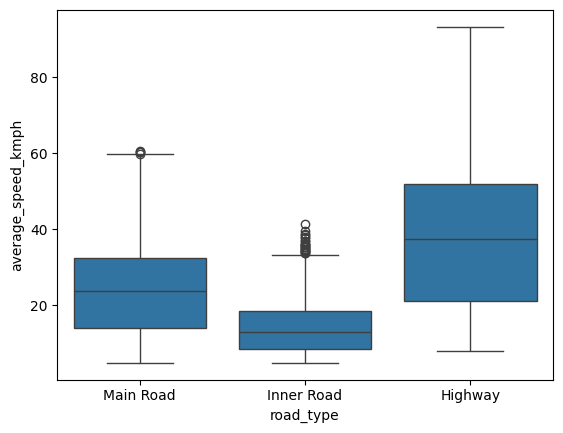

In [ ]:
sns.boxplot( y = df['average_speed_kmph'] ,  x = df['road_type'] )


<Axes: xlabel='weather_condition', ylabel='average_speed_kmph'>

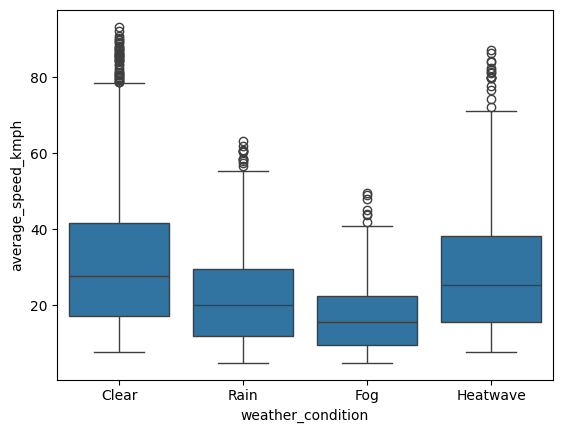

In [ ]:
sns.boxplot( y = df['average_speed_kmph'] ,  x = df["weather_condition"] )



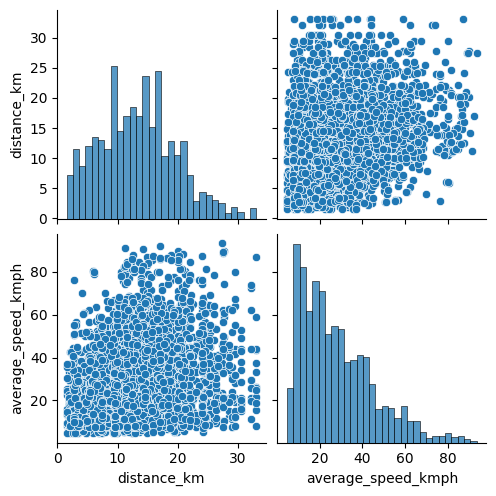

In [ ]:
sns.pairplot(data=df, vars=['distance_km' ,'average_speed_kmph'])

In [ ]:
from scipy.stats import f_oneway

categorical_cols = ['time_of_day', 'day_of_week', 'weather_condition', 'traffic_density_level', 'road_type']

print("ANOVA Test Results (Categorical Features vs. Average Speed):")
print("----------------------------------------------------------------")
for col in categorical_cols:
    groups = [df['average_speed_kmph'][df[col] == category] for category in df[col].unique()]
    f_statistic, p_value = f_oneway(*groups)
    print(f"Feature: {col}")
    print(f"  F-statistic: {f_statistic:.2f}")
    print(f"  P-value: {p_value:.3f}")
    if p_value < 0.05:
        print(f"  Conclusion: Significant difference in average speed across categories of {col} (p < 0.05)")
    else:
        print(f"  Conclusion: No significant difference in average speed across categories of {col} (p >= 0.05)")
    print("\n")


print("Correlation Test Results (Numerical Feature vs. Average Speed):")
print("------------------------------------------------------------------")
correlation = df['distance_km'].corr(df['average_speed_kmph'])
print(f"Pearson correlation between distance_km and average_speed_kmph: {correlation:.3f}")


ANOVA Test Results (Categorical Features vs. Average Speed):
----------------------------------------------------------------
Feature: time_of_day
  F-statistic: 166.65
  P-value: 0.000
  Conclusion: Significant difference in average speed across categories of time_of_day (p < 0.05)


Feature: day_of_week
  F-statistic: 154.33
  P-value: 0.000
  Conclusion: Significant difference in average speed across categories of day_of_week (p < 0.05)


Feature: weather_condition
  F-statistic: 113.97
  P-value: 0.000
  Conclusion: Significant difference in average speed across categories of weather_condition (p < 0.05)


Feature: traffic_density_level
  F-statistic: 1219.42
  P-value: 0.000
  Conclusion: Significant difference in average speed across categories of traffic_density_level (p < 0.05)


Feature: road_type
  F-statistic: 759.33
  P-value: 0.000
  Conclusion: Significant difference in average speed across categories of road_type (p < 0.05)


Correlation Test Results (Numerical Feature v

# Based on the statistical tests:
# - All categorical features (time_of_day, day_of_week, weather_condition, traffic_density_level, road_type) show a significant difference in average speed across their categories (p < 0.05).
#   This means they are important factors influencing average speed.
# - The numerical feature (distance_km) has a weak positive correlation with average_speed_kmph (0.235).
#   This suggests a slight tendency for average speed to increase with distance, but it's not a strong relationship

In [ ]:
df = df.drop(['Trip_ID' , 'start_area' , 'end_area'] ,  axis = 1)

In [ ]:
x = df.drop('average_speed_kmph' , axis = 1)
y = df['average_speed_kmph']


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Identify categorical columns in x
categorical_cols_x = x.select_dtypes(include='object').columns

# Apply Label Encoding to each categorical column
for col in categorical_cols_x:
    le = LabelEncoder()
    x[col] = le.fit_transform(x[col])

x.head()

,distance_km,time_of_day,day_of_week,weather_condition,traffic_density_level,road_type
0,9.44,3,0,0,1,2
1,2.15,3,1,0,1,2
2,14.54,2,0,3,0,1
3,11.86,3,0,0,1,0
4,20.26,0,0,1,2,0


In [ ]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.2 , random_state = 42)


In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error

# Initialize the Decision Tree Regressor model
dt_model = DecisionTreeRegressor(random_state=42)

# Train the model
dt_model.fit(x_train, y_train)

# Make predictions on the test set
y_pred = dt_model.predict(x_test)

# Calculate R2 score
r2 = r2_score(y_test, y_pred)
print(f"R2 Score: {r2:.3f}")

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.3f}")

R2 Score: 0.868
Mean Squared Error (MSE): 39.280


# Task
Train an XGBoost Regressor model for predicting traffic speeds using the `delhi_traffic_features.csv` dataset, optimizing hyperparameters with `GridSearchCV`, and then evaluate its performance using R2 score and Mean Squared Error.

## Import XGBoost

### Subtask:
Import the XGBoost library for regression.


**Reasoning**:
The subtask is to import the XGBoost library for regression. This involves importing `XGBRegressor` from the `xgboost` library. This can be done in a code block.



In [ ]:
from xgboost import XGBRegressor
print("XGBoost Regressor imported successfully.")

XGBoost Regressor imported successfully.


## Define XGBoost Regressor

### Subtask:
Initialize the XGBoost Regressor model.


**Reasoning**:
Initialize the XGBoost Regressor model with a random state for reproducibility.



In [ ]:
xgb_model = XGBRegressor(random_state=42)
print("XGBoost Regressor model initialized.")

XGBoost Regressor model initialized.


## Define Hyperparameter Grid

### Subtask:
Create a dictionary of hyperparameters for XGBoost to be used in GridSearchCV.


**Reasoning**:
Define a dictionary named `param_grid` containing the specified hyperparameter ranges for XGBoost, which will be used in GridSearchCV.



In [ ]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.7, 0.8, 0.9]
}
print("Hyperparameter grid defined successfully:")
print(param_grid)

Hyperparameter grid defined successfully:
{'n_estimators': [100, 200, 300], 'learning_rate': [0.01, 0.1, 0.2], 'max_depth': [3, 5, 7], 'subsample': [0.7, 0.8, 0.9]}


## Perform GridSearchCV for Hyperparameter Tuning

### Subtask:
Use GridSearchCV with cross-validation to find the best hyperparameters for the XGBoost model.


**Reasoning**:
First, import `GridSearchCV` for hyperparameter tuning. Then, initialize `GridSearchCV` with the XGBoost model, the defined `param_grid`, 5-fold cross-validation, and R-squared scoring, displaying verbose output. Finally, fit the `grid_search` object to the training data to find the best hyperparameters.



In [ ]:
from sklearn.model_selection import GridSearchCV

# Instantiate GridSearchCV
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='r2', verbose=2)

# Fit GridSearchCV to the training data
grid_search.fit(x_train, y_train)

print("GridSearchCV completed.")

Fitting 5 folds for each of 81 candidates, totalling 405 fits
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.7; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.7; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.7; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.7; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.7; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.3

**Reasoning**:
The next step is to retrieve and display the best hyperparameters found by the GridSearchCV. This is done by accessing the `best_params_` attribute of the `grid_search` object. This will inform the user about the optimal combination of hyperparameters for the XGBoost model.



In [ ]:
print("Best Hyperparameters:")
print(grid_search.best_params_)

Best Hyperparameters:
{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100, 'subsample': 0.9}


**Reasoning**:
Now that the best hyperparameters have been identified, the next step is to retrieve the best estimator from the `grid_search` object. This best estimator is the XGBoost model trained with the optimal hyperparameters found during the GridSearchCV process, which will then be used for evaluation.



In [ ]:
best_xgb_model = grid_search.best_estimator_
print("Best XGBoost model retrieved.")

Best XGBoost model retrieved.


**Reasoning**:
The next step is to make predictions on the test set using the `best_xgb_model` to evaluate its performance. This is a crucial step before calculating evaluation metrics.



In [ ]:
y_pred_xgb = best_xgb_model.predict(x_test)
print("Predictions made using the best XGBoost model.")

Predictions made using the best XGBoost model.


**Reasoning**:
Now that predictions have been made, the next step is to evaluate the model's performance. This involves calculating the R2 score and Mean Squared Error (MSE) using the predicted values (`y_pred_xgb`) and the actual test values (`y_test`).



In [ ]:
from sklearn.metrics import r2_score, mean_squared_error

# Calculate R2 score for the XGBoost model
r2_xgb = r2_score(y_test, y_pred_xgb)
print(f"XGBoost R2 Score: {r2_xgb:.3f}")

# Calculate Mean Squared Error (MSE) for the XGBoost model
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
print(f"XGBoost Mean Squared Error (MSE): {mse_xgb:.3f}")

XGBoost R2 Score: 0.926
XGBoost Mean Squared Error (MSE): 22.198


## Summary:

### Data Analysis Key Findings
*   An XGBoost Regressor model was initialized with `random_state=42` for reproducibility.
*   A hyperparameter grid was defined for `GridSearchCV`, including `n_estimators` (100, 200, 300), `learning_rate` (0.01, 0.1, 0.2), `max_depth` (3, 5, 7), and `subsample` (0.7, 0.8, 0.9).
*   `GridSearchCV` was performed with 5-fold cross-validation, evaluating 81 distinct hyperparameter combinations, totaling 405 fits.
*   The optimal hyperparameters identified by `GridSearchCV` were `learning_rate=0.1`, `max_depth=5`, `n_estimators=100`, and `subsample=0.9`.
*   The best-performing XGBoost model achieved a high R2 Score of 0.926 on the test set, indicating it explains approximately 92.6% of the variance in traffic speeds.
*   The Mean Squared Error (MSE) for the best model was 22.198, providing a measure of the average squared difference between predicted and actual traffic speeds.

### Insights or Next Steps
*   The optimized XGBoost model demonstrates strong predictive power for traffic speeds, achieving a very good fit to the data.
*   Further exploration could involve a more granular hyperparameter search around the identified best parameters, or investigating feature importance to understand which factors most influence traffic speed predictions.


In [ ]:
print("Train R2:", best_xgb_model.score(x_train, y_train))
print("Test R2:", best_xgb_model.score(x_test, y_test))

Train R2: 0.9422406747553247
Test R2: 0.9255557314342883


In [ ]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(best_xgb_model, x_train, y_train, cv=5, scoring='r2')
print("CV R2 Mean:", cv_scores.mean())


CV R2 Mean: 0.9205500413571507


In [ ]:
import numpy as np
print("RMSE:", np.sqrt(22.198))


RMSE: 4.7114753527955555


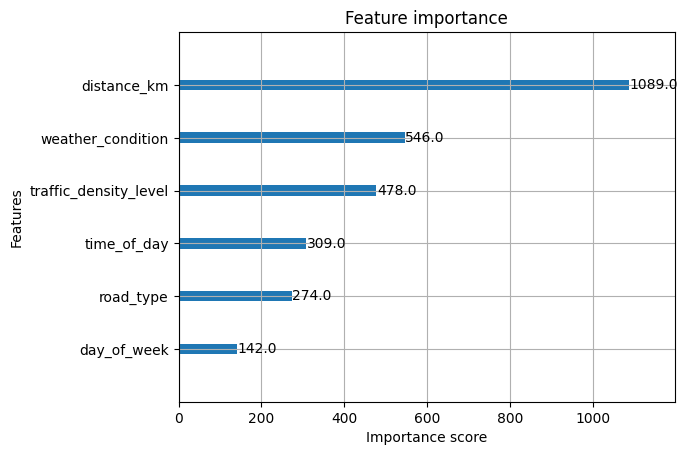

In [ ]:
import matplotlib.pyplot as plt
from xgboost import plot_importance

plot_importance(best_xgb_model)
plt.show()
